In [1]:
from astropy.io import fits
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import redh3p as rhp
from PIL import Image

from lmfit import Model

import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

import os
spec_dir = os.path.abspath('./../../spec/')+'/'
figs_dir = os.path.abspath('./../../figures')
plots_dir = os.path.abspath('./../../plots/north/temp')

h3p_density = fits.open('h3p_dens_map.fits', ignore_missing_end=True)[0].data
h3p_temperature = fits.open('h3p_temp_map.fits', ignore_missing_end=True)[0].data
h3p_density_errs = fits.open('h3p_dens_map_errs.fits', ignore_missing_end=True)[0].data
h3p_temperature_errs = fits.open('h3p_temp_map_errs.fits', ignore_missing_end=True)[0].data

h3p_int = fits.open('h3p_int_shifted.fits', ignore_missing_end=True)[0].data
h2_h3p_flow = fits.open('h2_h3p_flow.fits', ignore_missing_end=True)[0].data
h2_h3p_flow_errs = fits.open('h2_h3p_flow_errs.fits', ignore_missing_end=True)[0].data
h2_h3p_flow_min = fits.open('h2_h3p_flow_min.fits', ignore_missing_end=True)[0].data
h2_vprf_v2 = fits.open('h2_vprf_v2.fits', ignore_missing_end=True)[0].data
h3p_vprf_v2 = fits.open('h3p_vprf_v2.fits', ignore_missing_end=True)[0].data
h2_verr_v2 = fits.open('h2_verr_v2.fits', ignore_missing_end=True)[0].data
h3p_verr_v2 = fits.open('h3p_verr_v2.fits', ignore_missing_end=True)[0].data
h2_int_v2 = fits.open('h2_int_v2.fits', ignore_missing_end=True)[0].data
h3p_int_v2 = fits.open('h3p_int_v2.fits', ignore_missing_end=True)[0].data

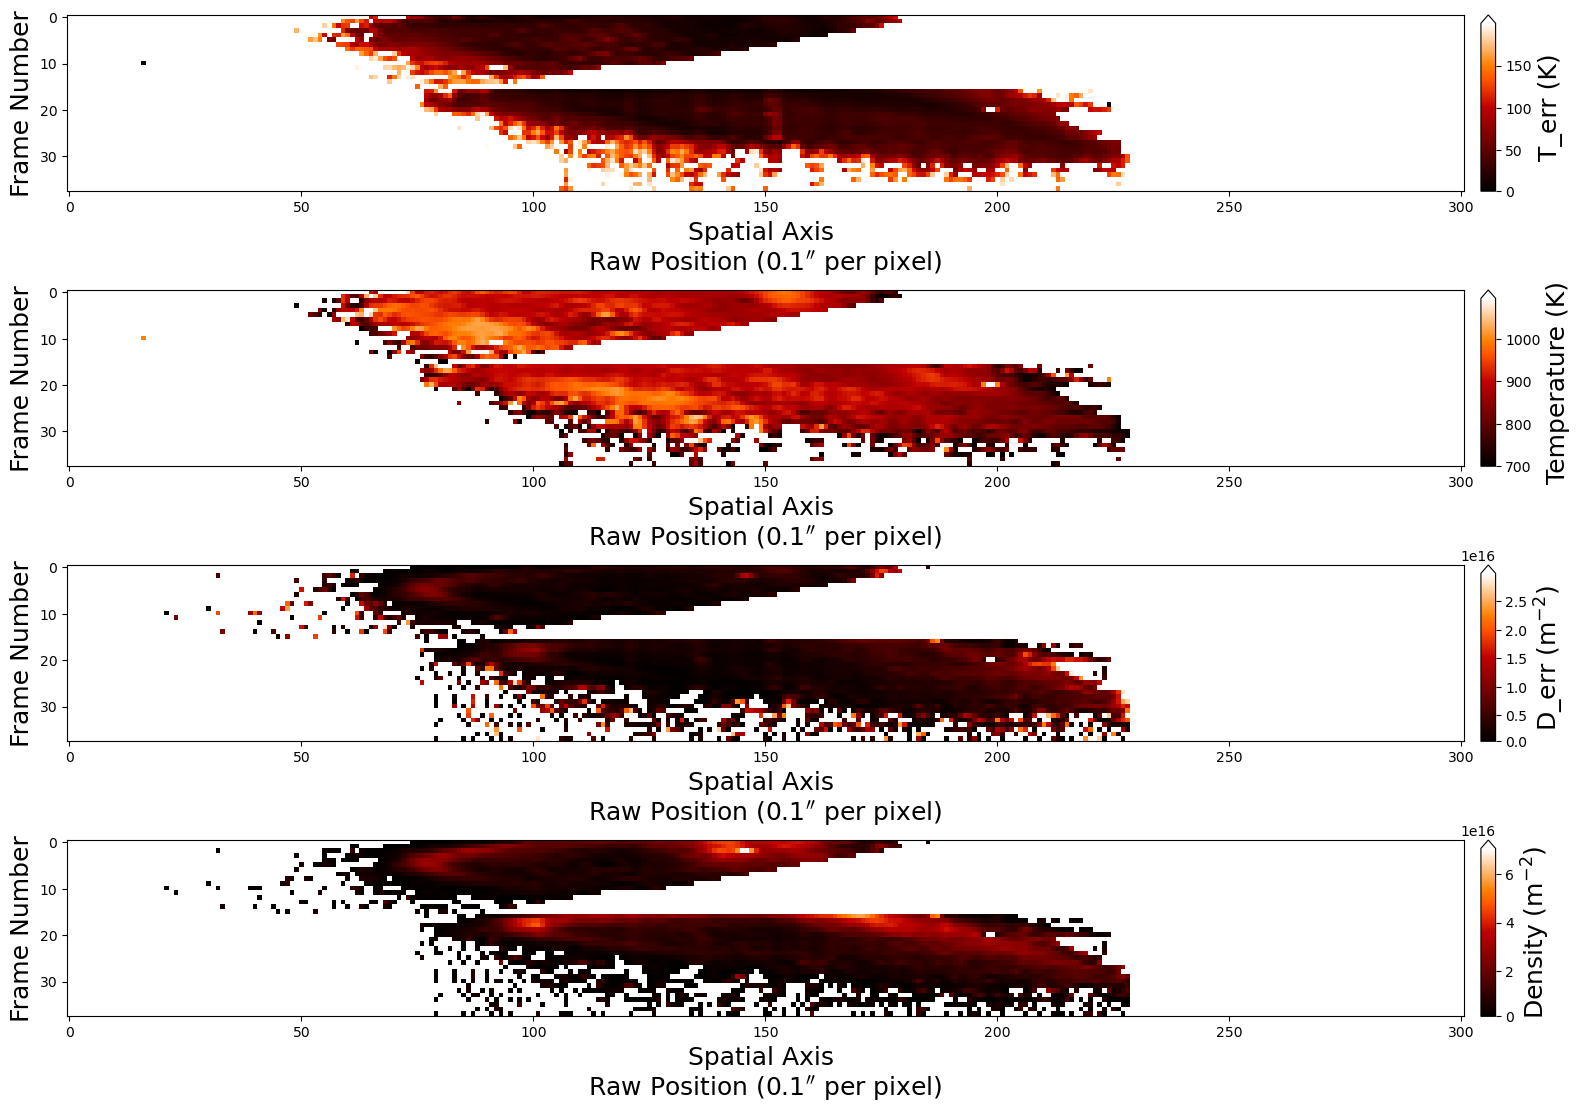

In [2]:
h3p_dens1 = np.roll(h3p_density[:6], 23, axis=1)
h3p_dens2 = np.roll(h3p_density[6:11], 22, axis=1)
h3p_dens3 = np.roll(h3p_density[11:16], 30, axis=1)
h3p_dens4 = np.roll(h3p_density[16:27], -14, axis=1)
h3p_dens5 = np.roll(h3p_density[27:], -18, axis=1)

h3p_dens = np.vstack((h3p_dens1, h3p_dens2, h3p_dens3, h3p_dens4, h3p_dens5))

for i in range(16):
    h3p_dens[i,:] = scipy.ndimage.shift(h3p_dens[i,:], i*6, order=5)
    
h3p_dens = np.flip(h3p_dens, axis=1)

h3p_temp1 = np.roll(h3p_temperature[:6], 23, axis=1)
h3p_temp2 = np.roll(h3p_temperature[6:11], 22, axis=1)
h3p_temp3 = np.roll(h3p_temperature[11:16], 30, axis=1)
h3p_temp4 = np.roll(h3p_temperature[16:27], -14, axis=1)
h3p_temp5 = np.roll(h3p_temperature[27:], -18, axis=1)

h3p_temp = np.vstack((h3p_temp1, h3p_temp2, h3p_temp3, h3p_temp4, h3p_temp5))

for i in range(16):
    h3p_temp[i,:] = scipy.ndimage.shift(h3p_temp[i,:], i*6, order=5)
    
h3p_temp = np.flip(h3p_temp, axis=1)

h3p_dens_errs1 = np.roll(h3p_density_errs[:6], 23, axis=1)
h3p_dens_errs2 = np.roll(h3p_density_errs[6:11], 22, axis=1)
h3p_dens_errs3 = np.roll(h3p_density_errs[11:16], 30, axis=1)
h3p_dens_errs4 = np.roll(h3p_density_errs[16:27], -14, axis=1)
h3p_dens_errs5 = np.roll(h3p_density_errs[27:], -18, axis=1)

h3p_dens_errs = np.vstack((h3p_dens_errs1, h3p_dens_errs2, h3p_dens_errs3, h3p_dens_errs4, h3p_dens_errs5))

for i in range(16):
    h3p_dens_errs[i,:] = scipy.ndimage.shift(h3p_dens_errs[i,:], i*6, order=5)
    
h3p_dens_errs = np.flip(h3p_dens_errs, axis=1)

h3p_temp_errs1 = np.roll(h3p_temperature_errs[:6], 23, axis=1)
h3p_temp_errs2 = np.roll(h3p_temperature_errs[6:11], 22, axis=1)
h3p_temp_errs3 = np.roll(h3p_temperature_errs[11:16], 30, axis=1)
h3p_temp_errs4 = np.roll(h3p_temperature_errs[16:27], -14, axis=1)
h3p_temp_errs5 = np.roll(h3p_temperature_errs[27:], -18, axis=1)

h3p_temp_errs = np.vstack((h3p_temp_errs1, h3p_temp_errs2, h3p_temp_errs3, h3p_temp_errs4, h3p_temp_errs5))

for i in range(16):
    h3p_temp_errs[i,:] = scipy.ndimage.shift(h3p_temp_errs[i,:], i*6, order=5)
    
h3p_temp_errs = np.flip(h3p_temp_errs, axis=1)

h3p_dens_errs[h3p_dens_errs > 3e16] = np.nan
h3p_dens_errs[h3p_dens_errs < 1e14] = np.nan
h3p_dens[np.isnan(h3p_dens_errs)] = np.nan

h3p_temp_errs[h3p_temp_errs > 200] = np.nan
h3p_temp_errs[h3p_temp_errs < 1] = np.nan
h3p_temp[np.isnan(h3p_temp_errs)] = np.nan

h3p_temp[h3p_temp > 1100] = np.nan
h3p_temp[h3p_temp < 700] = np.nan
h3p_temp_errs[np.isnan(h3p_temp)] = np.nan

h3p_dens[h3p_dens < 1e15] = np.nan
h3p_dens[h3p_dens > 8e16] = np.nan
h3p_dens_errs[np.isnan(h3p_dens)] = np.nan


fig = plt.figure(figsize=(18,11), tight_layout=True)

fig.add_subplot(411)
plt.imshow(h3p_temp_errs, cmap='gist_heat', norm=colors.PowerNorm(gamma=1))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='T_err (K)',size=18)

fig.add_subplot(412)
plt.imshow(h3p_temp, cmap='gist_heat', norm=colors.PowerNorm(gamma=1))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Temperature (K)',size=18)

fig.add_subplot(413)
plt.imshow(h3p_dens_errs, cmap='gist_heat', norm=colors.PowerNorm(gamma=1))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='D_err (m$^{-2}$)',size=18)

fig.add_subplot(414)
plt.imshow(h3p_dens, cmap='gist_heat', norm=colors.PowerNorm(gamma=1))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Density (m$^{-2}$)',size=18)

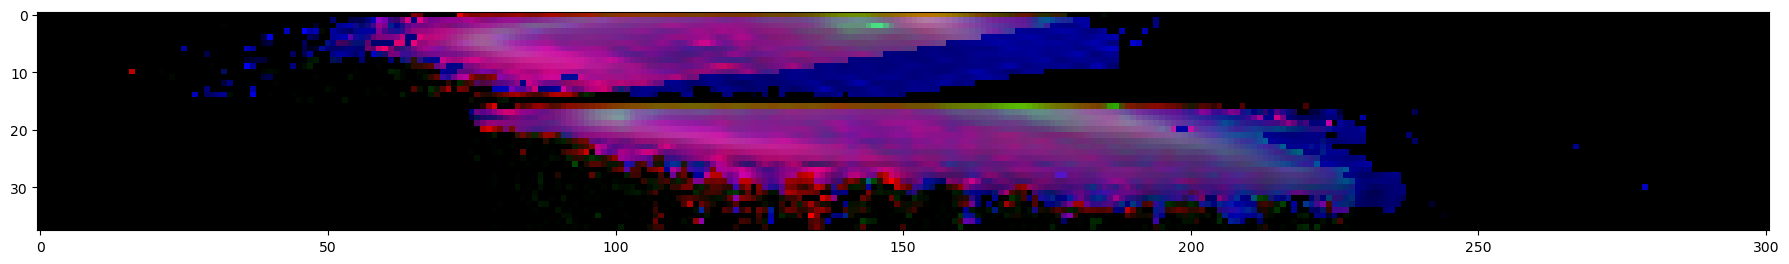

In [4]:
fig = plt.figure(figsize=(18,6), tight_layout=True)

rgb_img = np.zeros((38,301,3))
rgb_img[:,:,0] = (h3p_temp - 700) / 400
rgb_img[:,:,1] = (h3p_dens) / 8e16
rgb_img[:,:,2] = (h2_h3p_flow + 7.5) / 16
# rgb_img[:,:,2] = (h2_h3p_flow ) / 3


fig.add_subplot(211)
plt.imshow(rgb_img)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


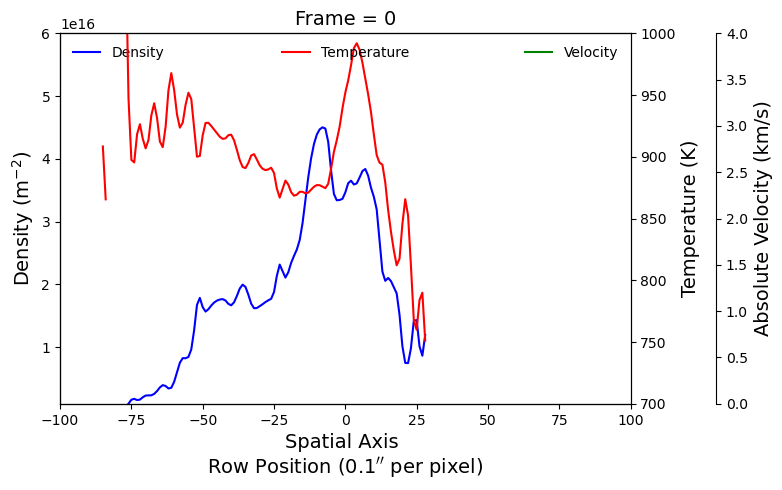

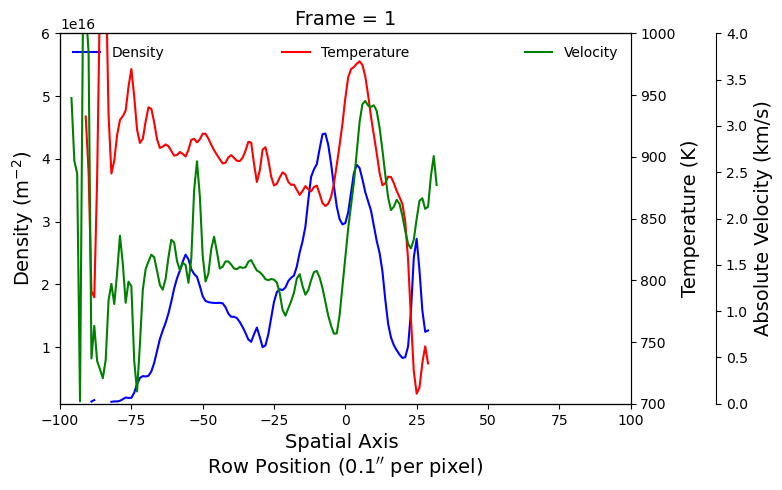

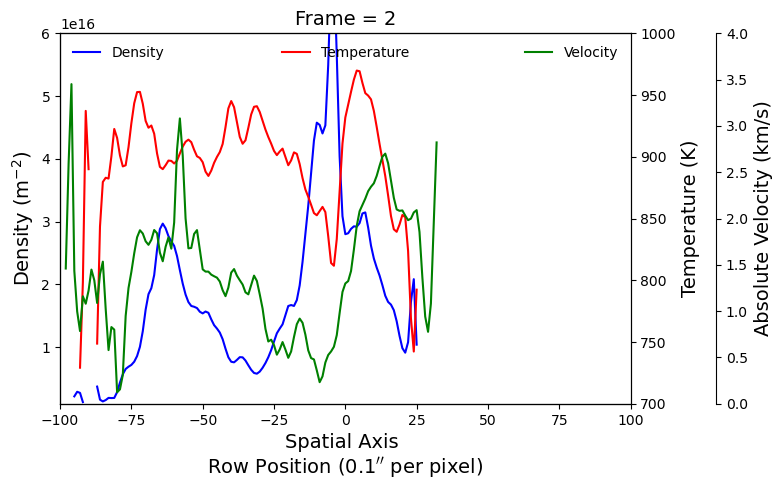

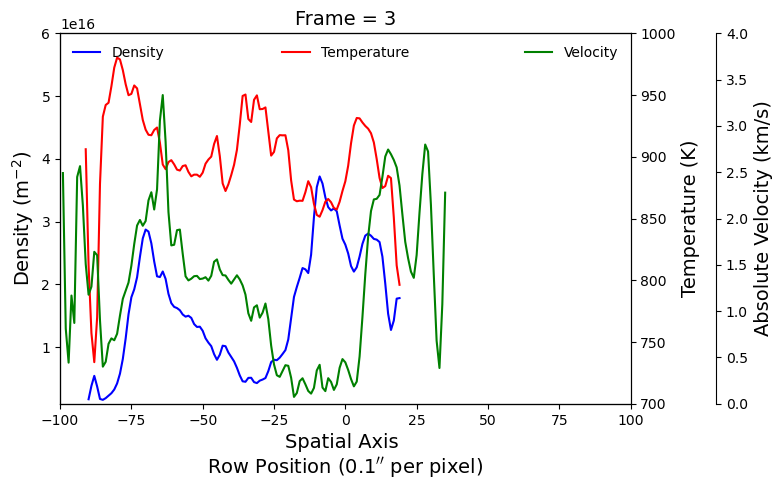

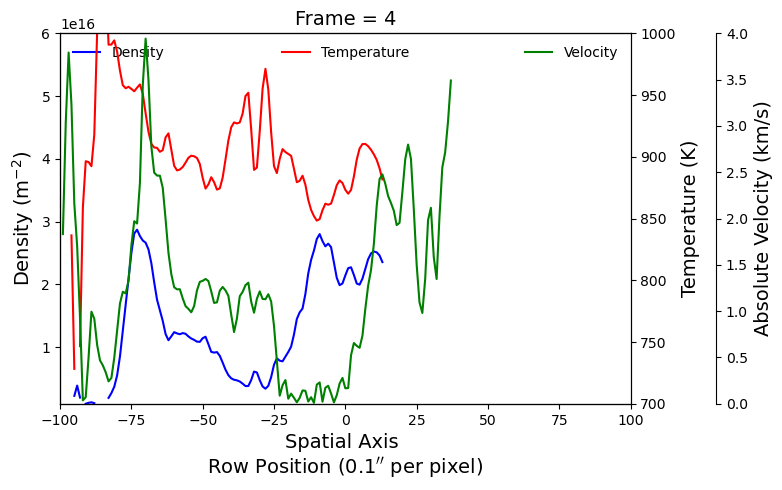

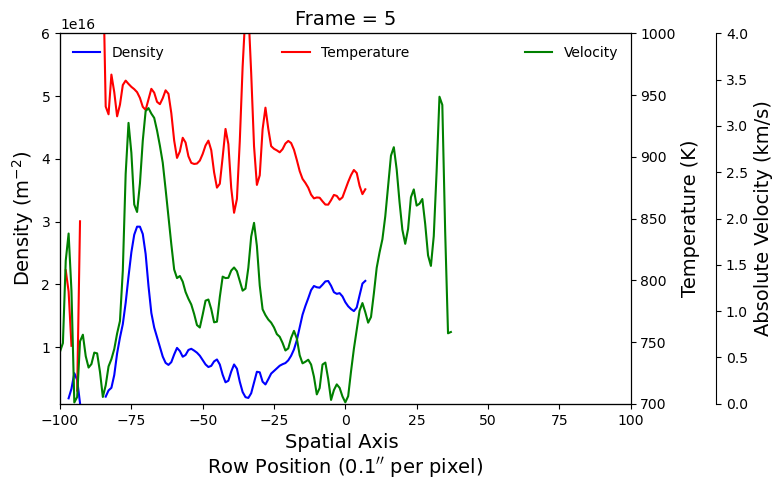

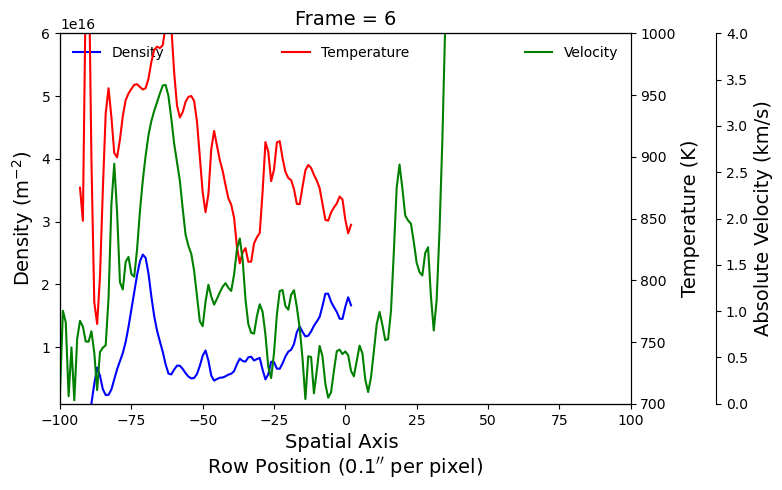

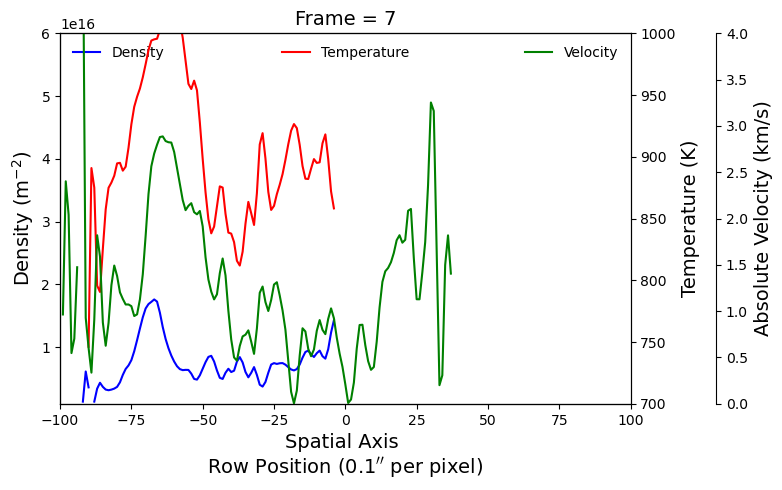

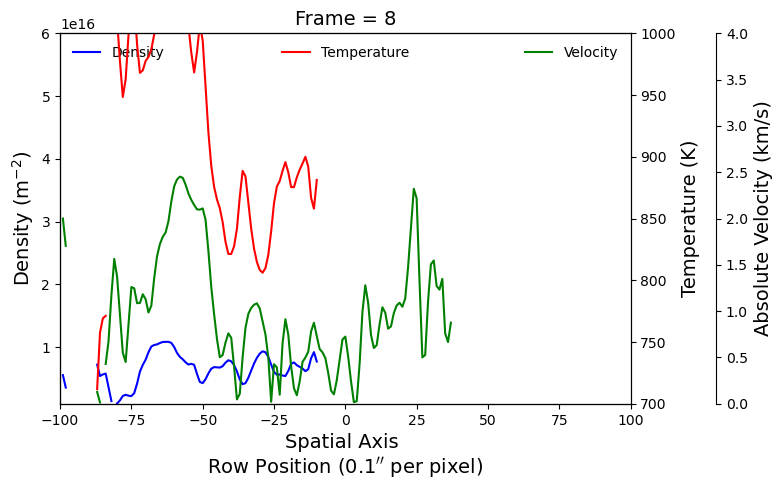

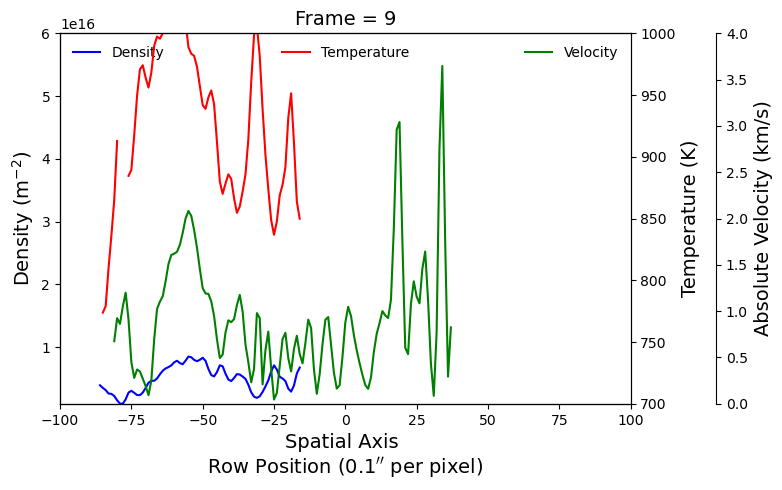

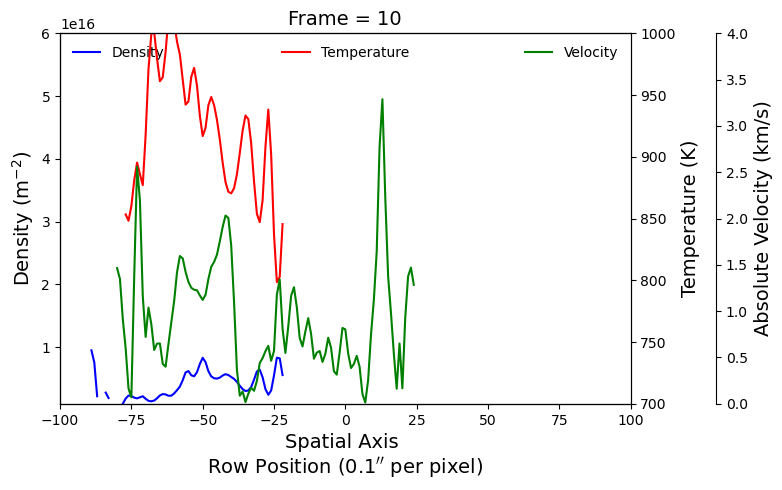

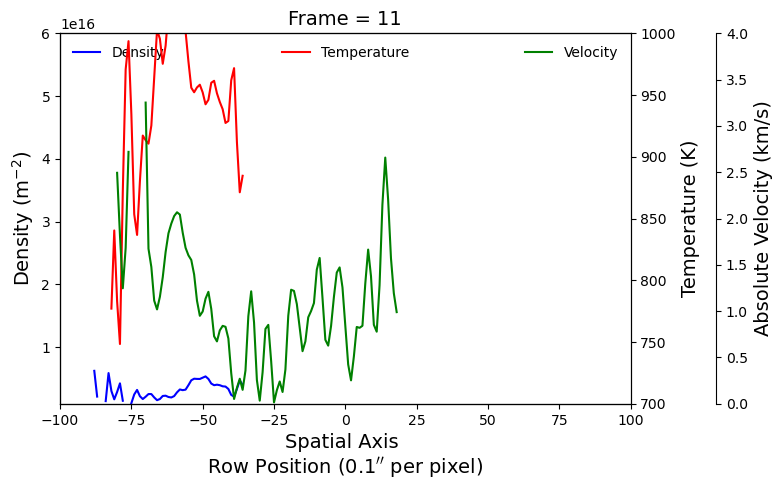

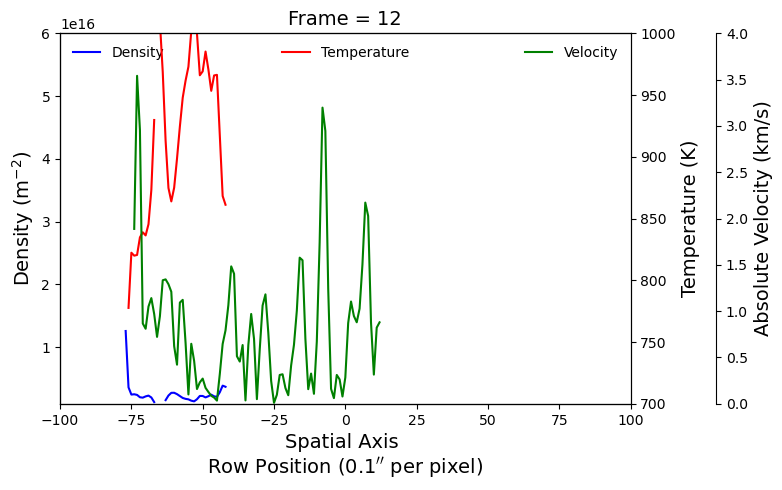

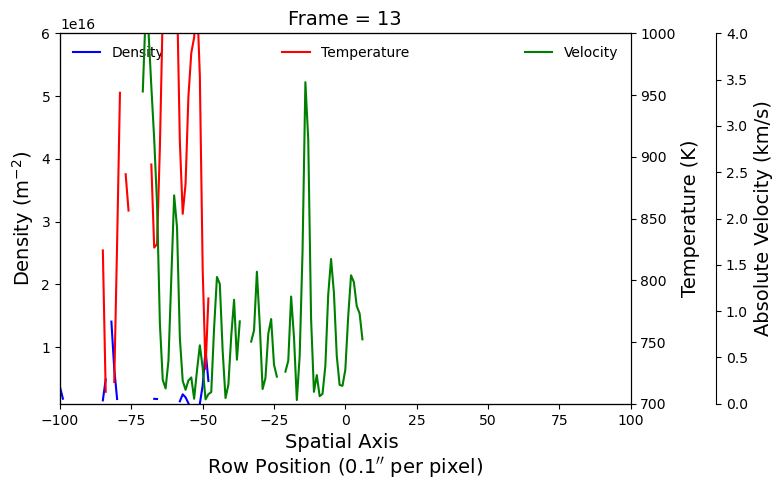

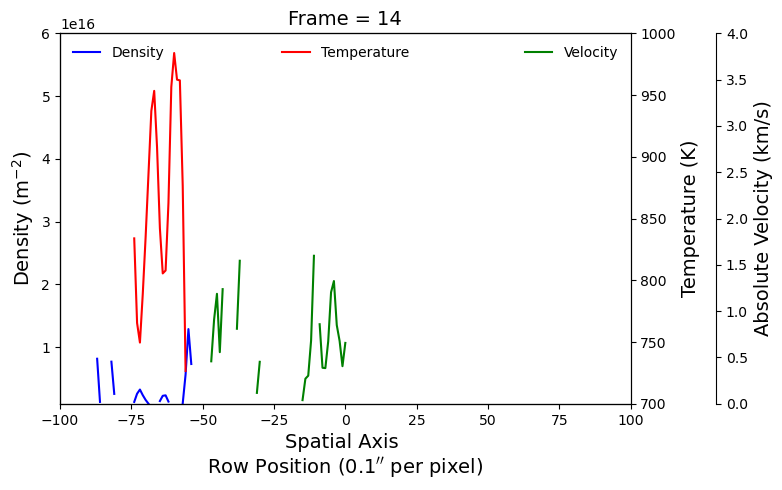

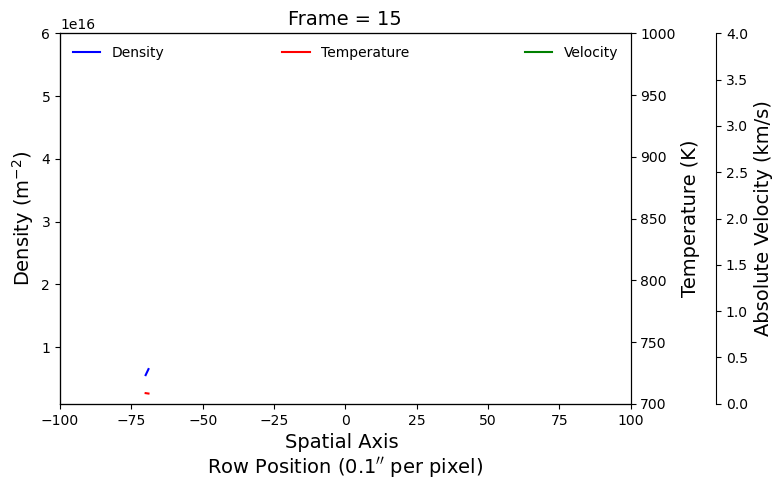

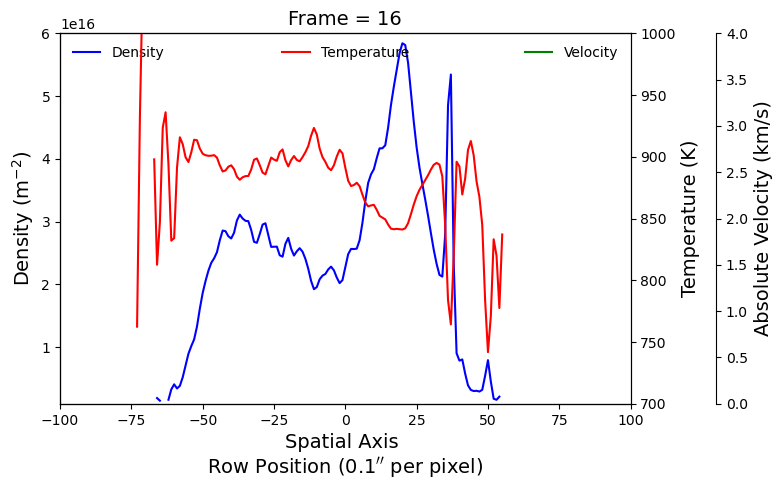

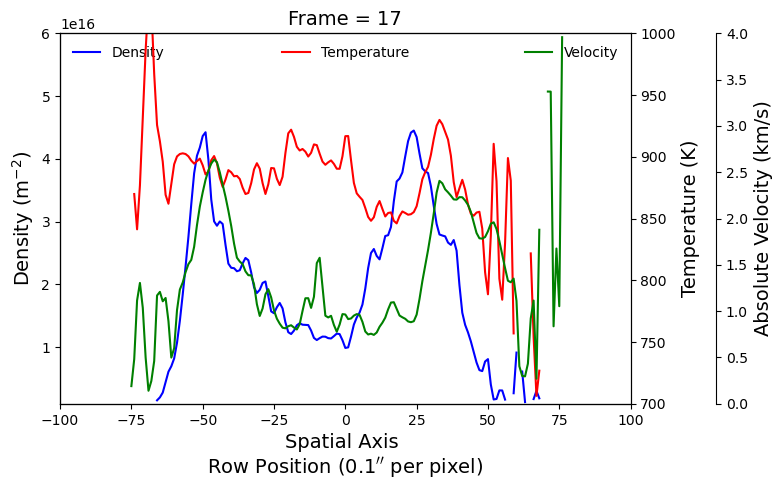

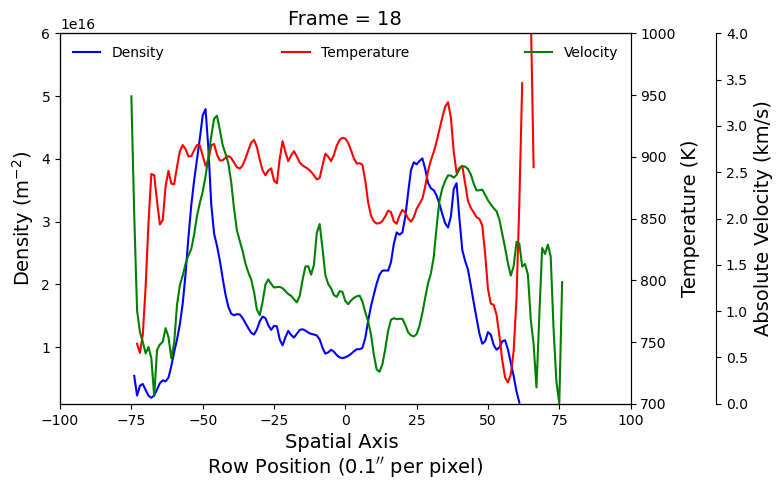

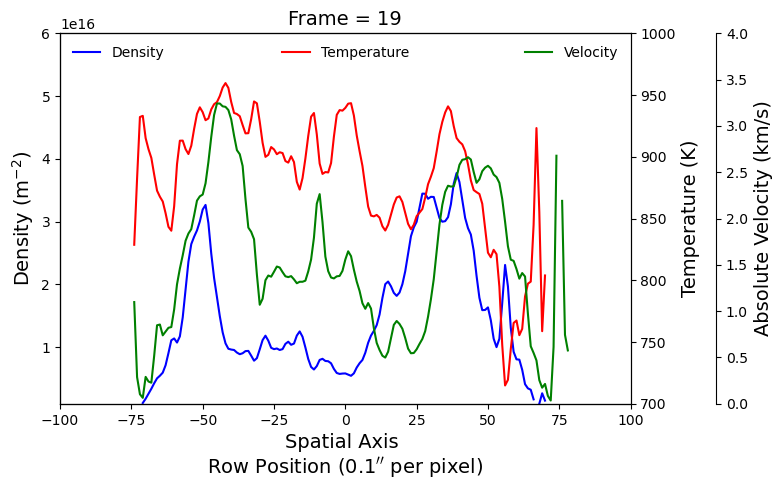

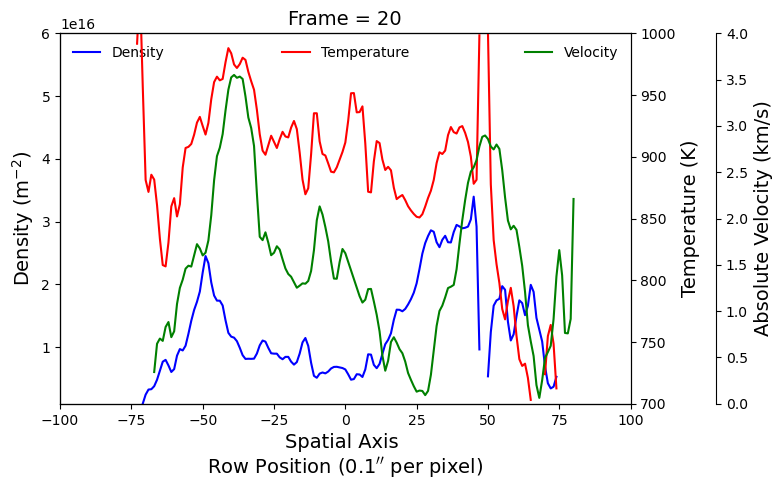

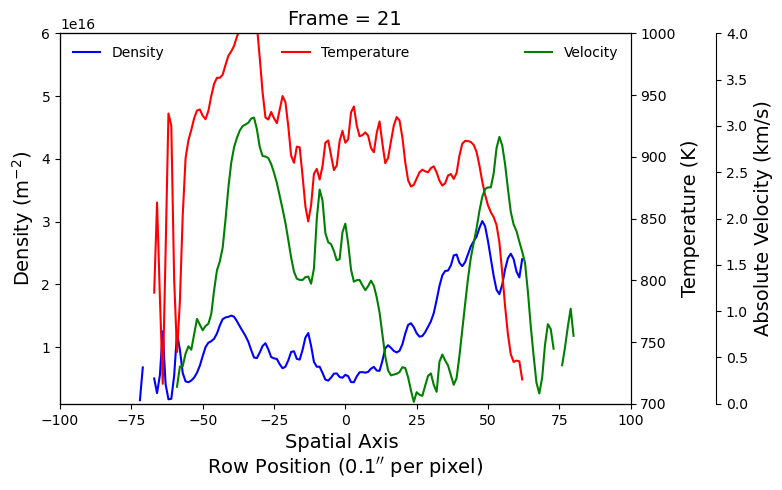

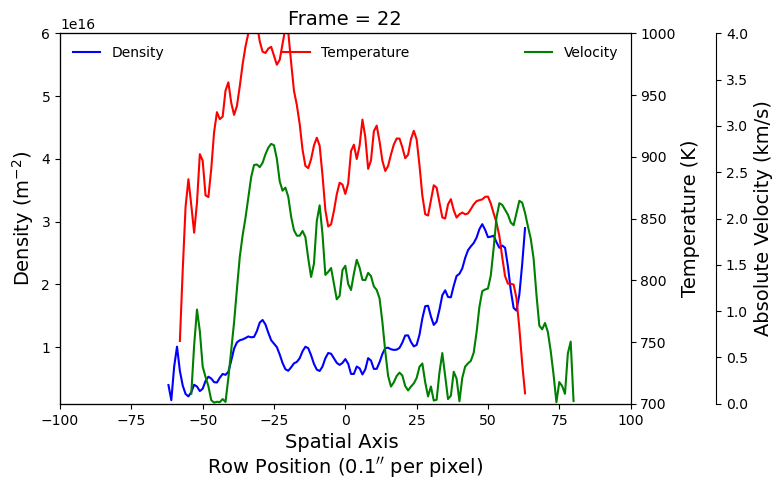

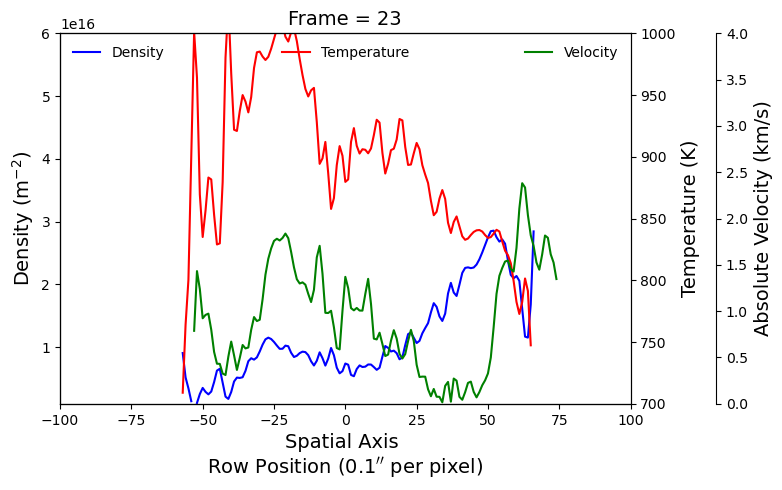

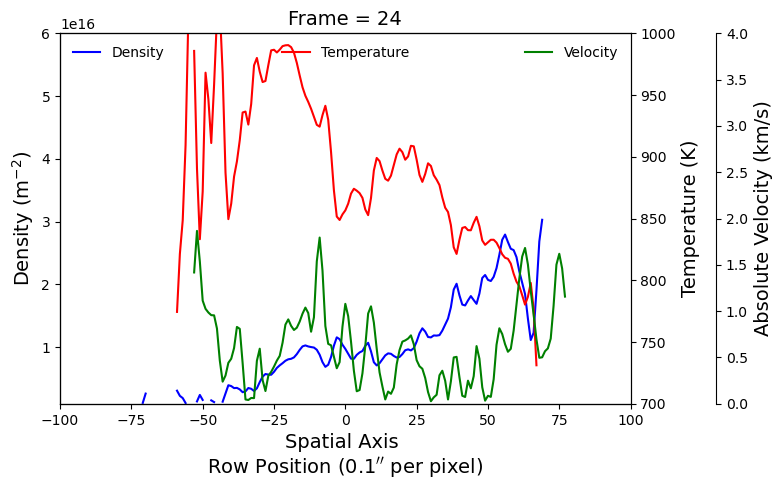

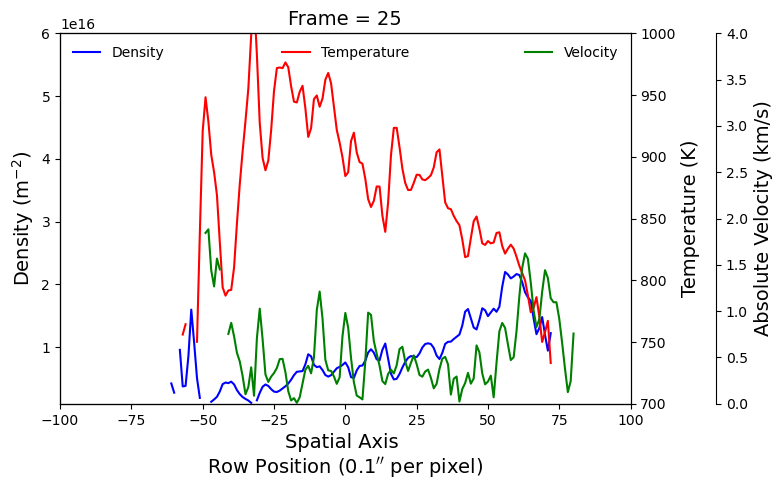

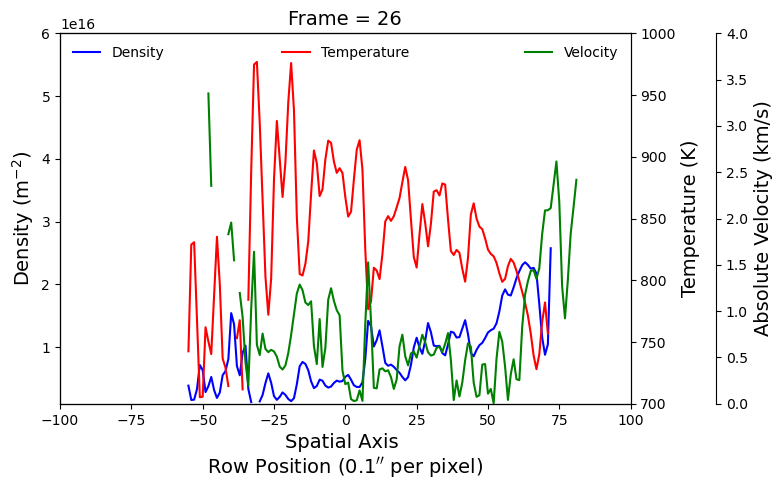

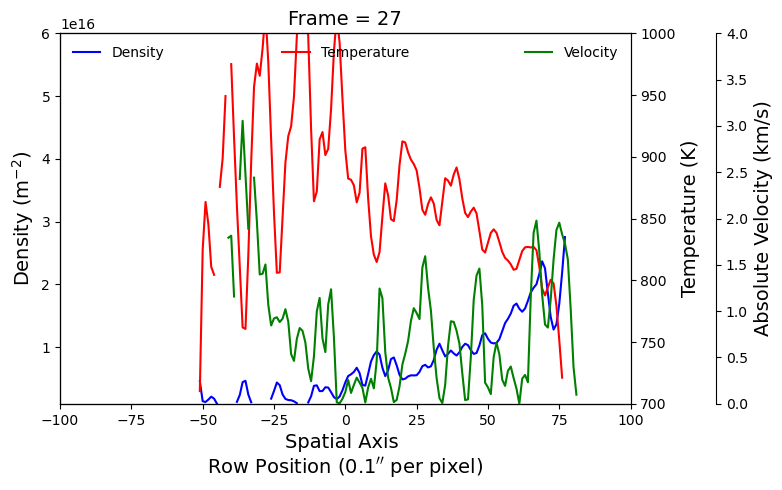

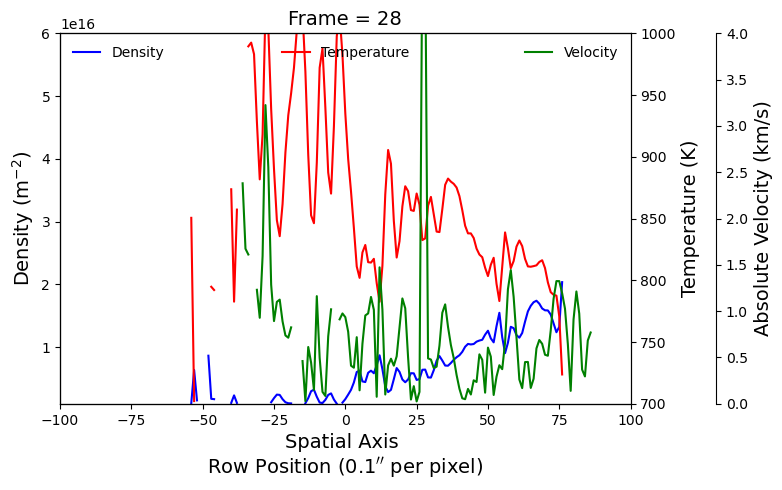

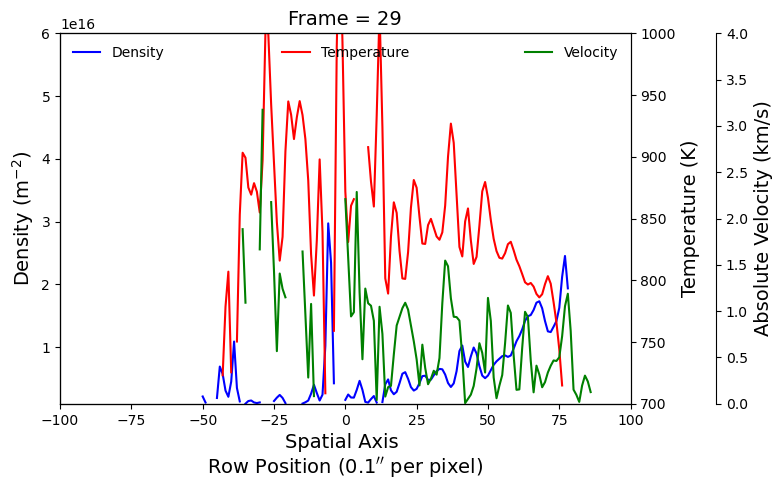

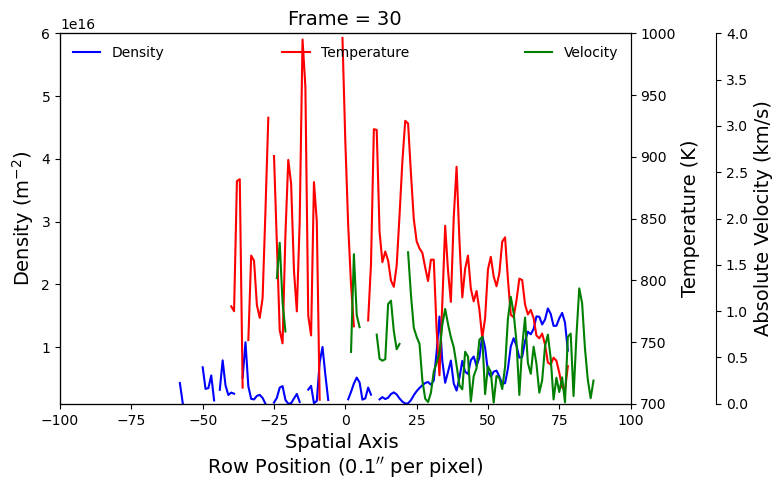

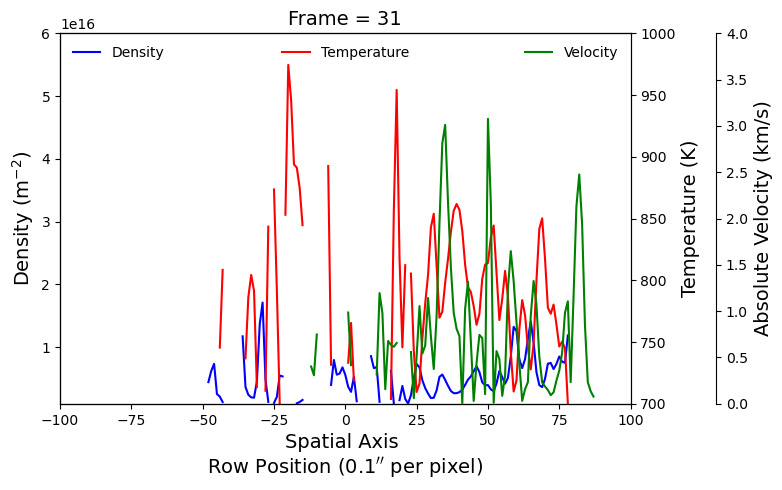

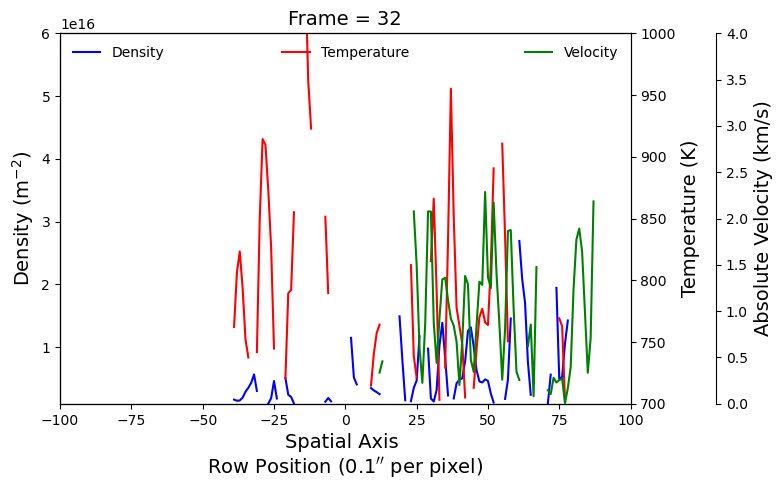

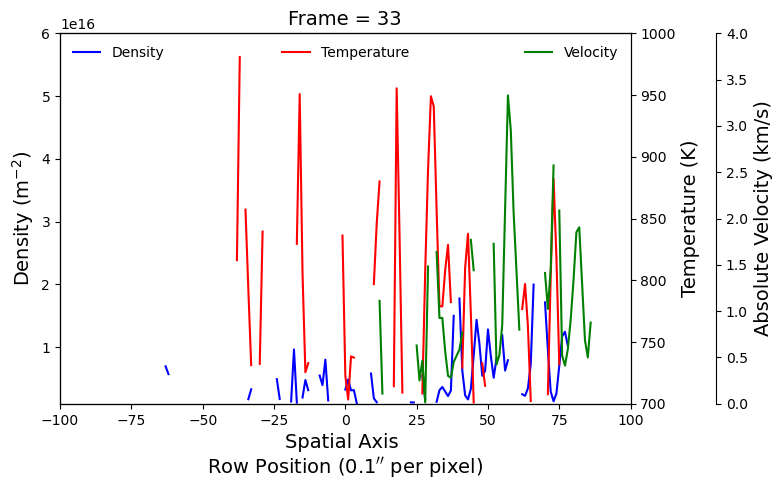

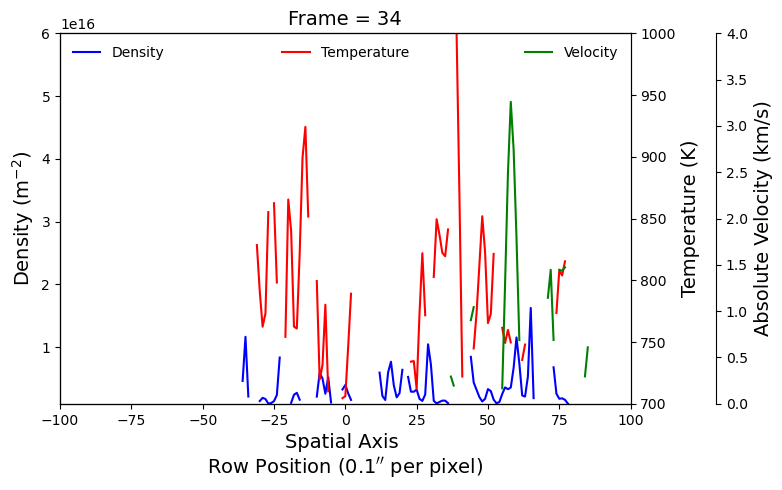

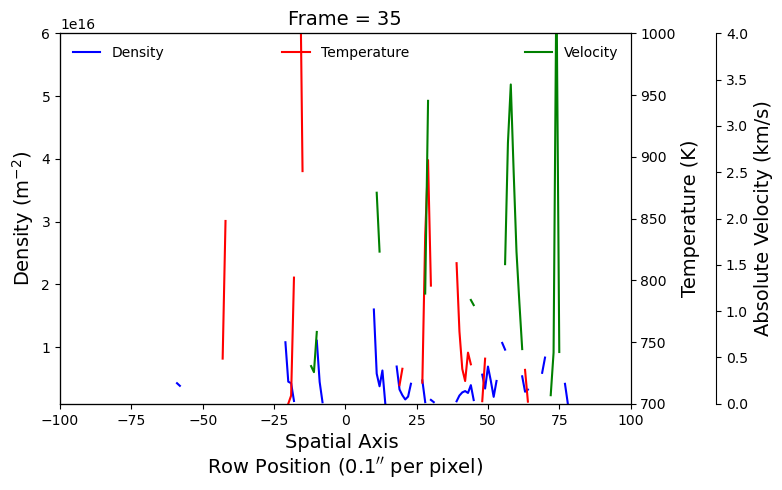

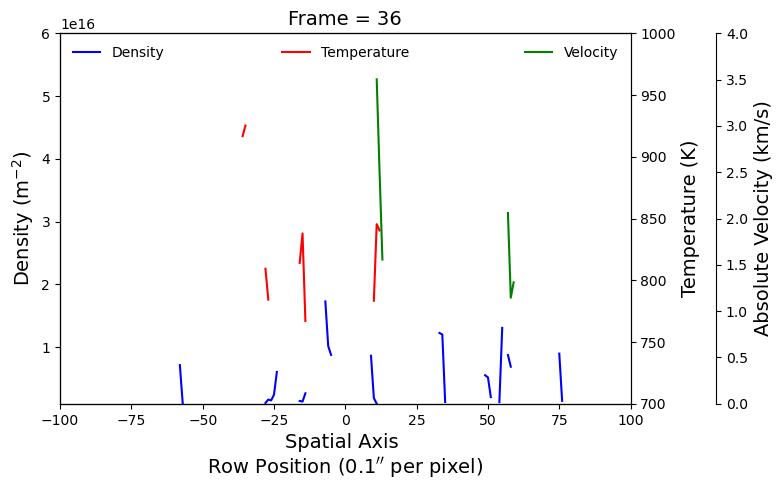

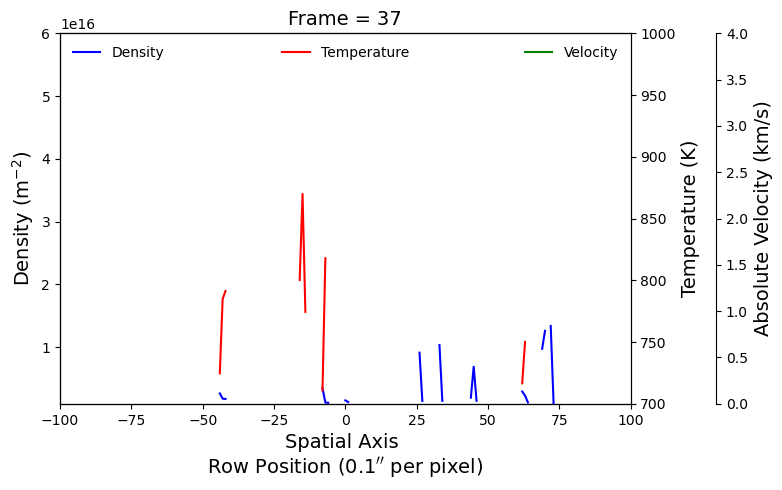

In [12]:
for i in range(len(h3p_temp)):
# for i in range(18,19):
    
    xnew = np.linspace(-150,150,301)

    fig, ax = plt.subplots(figsize = (8, 5))
#     plt.title('CML = '+ str(cml[i]), fontsize=14)
    plt.title('Frame = '+str(i), fontsize=14)
    
    temp = h3p_temp[i]
    temp_errs = h3p_temp_errs[i]
    
    dens = h3p_dens[i]
    dens_errs = h3p_dens_errs[i]
    
    flow = np.abs(h2_h3p_flow[i])
    flow_errs = h2_h3p_flow_errs[i]
    
    dmax = dens + dens_errs
    dmin = dens - dens_errs

    tmax = temp + temp_errs
    tmin = temp - temp_errs
    
    fmax = flow + flow_errs
    fmin = flow - flow_errs

    ax.plot(xnew, dens, color='blue', label='Density')
#     ax.plot(xnew, dmax, color='blue', alpha=0.1)
#     ax.plot(xnew, dmin, color='blue', alpha=0.1)
#     ax.fill_between(xnew, dmin, dmax, color='b', alpha=0.1)
    ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
    ax.set_ylabel('Density (m$^{-2}$)', fontsize=14)
    ax.set_ylim(1e15,6e16)
    
    ax2 = ax.twinx()
    
    ax2.plot(xnew, temp, color='red', label='Temperature')
#     ax2.plot(xnew, tmax, color='red', alpha=0.1)
#     ax2.plot(xnew, tmin, color='red', alpha=0.1)
#     ax2.fill_between(xnew, tmin, tmax, color='r', alpha=0.1)
    ax2.set_ylabel('Temperature (K)', fontsize=14)
    ax2.set_ylim(700,1000)
    
    ax3 = ax.twinx()
    ax3.spines.right.set_position(("axes", 1.15))
    
    ax3.plot(xnew, flow, color='green', label='Velocity')
#     ax3.plot(xnew, fmax, color='green', alpha=0.1)
#     ax3.plot(xnew, fmin, color='green', alpha=0.1)
#     ax3.fill_between(xnew, fmin, fmax, color='green', alpha=0.1)
    ax3.set_ylabel('Absolute Velocity (km/s)', fontsize=14)
    ax3.set_ylim(0,4)
    
#     int2 = (h3p_int/np.nanmax(h3p_int[i])*np.nanmax(dens))
#     ax.plot(xnew, int2[i], color='k', ls=':', label='H$_3^{+}$ Intensity', lw=2.5)
    
    plt.xlim(-100,100)
    
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    
    ax.legend(lines, labels, loc=2, frameon=False)
    ax2.legend(lines2, labels2, loc=9, frameon=False)
    ax3.legend(lines3, labels3, loc=1, frameon=False)
#     ax.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc=1)

    plt.tight_layout()
#     plt.savefig(plots_dir+'/h3p_temp_dens_flow_fr'+str(i)+'.pdf', dpi=400, bbox_inches='tight', facecolor='white')

In [209]:
np.nanmean(h3p_temp_shifted), np.nanmean(h3p_temp_errs_shifted)

(861.3929557656444, 88.23429122372329)

In [210]:
np.nanmean(h3p_dens_shifted), np.nanmean(h3p_dens_errs_shifted)

(1.0471863500685892e+16, 7304792293335621.0)

In [211]:
'{:.2e}'.format(np.nanmean(h3p_dens_shifted))

'1.05e+16'

In [205]:
'{:.2e}'.format(np.nanmean(h3p_dens_errs_shifted))

'7.30e+15'